---

<font color="green">Комментарий тимлида</font>

Привет! Это Дарина) Спасибо тебе за работу!

По ходу тетрадки ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «Комментарий тимлида». Постарайся учесть эти комментарии для дальнейших проектов.

Пожалуйста, не удаляй комментарии.

---

Я буду красить комментарии цветом:

<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---

<font color="green">Комментарий тимлида v2</font>

Привет! Мои новые комментарии будут отмечены -- v2

# Поехали

Презентация и проект находятся по это ссылке:

https://drive.google.com/file/d/1TySws8HIPMi5m291ztOACqJncttlKSzk/view?usp=drivesdk

**Ваше задание на финальный проект:**

Сформируйте модель монетизации игрового приложения:

- Проведите исследовательский анализ данных
- Проанализируйте влияние событий на совершение целевого события
- Проверьте статистические гипотезы

    *Проверьте гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.*

    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных*



# Задачи: 

* Построить воронку пользовательских событий
* Посчитать затраты на рекламные источники
* Посчитать ретеншн
* Посмотреть конверсию в целевое действие в разрезе источников
* Проверка статистической гипотезы  различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.
* Предложить модель монетизации: можно посчитать во сколько обходится привлечение одного пользователя с каждого источника и предложить способ зарабатывать на пользователе минимум столько же денег. Возможно стоит определить в каком именно окне можно сделать показ рекламы и сколько он должен будет приносить для окупаемости 

# Импорт библиотек


In [1]:
import pandas as pd
import seaborn as sns 
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
palette = sns.light_palette("green")
sns.set_palette(palette)

# Этап № 0. Первое знакомство с данными. 

* Загрузка данных  
* Проверка целостности: пропуски/дубликаты
* Проверка корректности типов данных
* Визуальное ознакомление с датафреймами
    

In [2]:
events = pd.read_csv('events.csv')

In [3]:
events.sample(10)

,event_datetime,event,building_type,user_id,project_type
54121,2020-05-09 07:45:17,building,assembly_shop,608bc548-b4b2-4373-9d21-65819ec2ef28,NaN
57409,2020-05-09 13:50:20,building,spaceport,df056a96-2942-4924-856a-7940ce3f2412,NaN
83803,2020-05-11 15:48:51,building,research_center,ae14eeff-e8e0-4767-9b9d-6fab4c777093,NaN
5814,2020-05-04 17:22:21,building,assembly_shop,3f7ed542-6c82-4496-93ba-4146522ff9b4,NaN
123867,2020-05-17 23:19:02,building,spaceport,4ee6e121-4d91-4e7f-a843-f87303939b27,NaN
74662,2020-05-10 18:21:55,building,assembly_shop,f059320a-af59-4d5f-8276-e21633d3dd73,NaN
73025,2020-05-10 15:54:40,building,assembly_shop,a5a9efa4-8a32-4e84-8bdd-eb10d7c709b5,NaN
67294,2020-05-10 06:49:42,building,assembly_shop,5db6c685-d750-49b4-b9a9-0c31ec63ae16,NaN
132308,2020-05-21 23:26:39,building,spaceport,b4f7762d-c71c-4bdf-bf5c-d36cc9f3f683,NaN
94636,2020-05-13 00:24:33,building,spaceport,74417e13-e7dd-4252-87f8-ab31c419ca99,NaN


Датасет *events.csv* содержит колонки:

- `event_datetime` - время совершения события
- `event` - название события
- `building_type` - тип объекта строительства
- `user_id` - идентификатор пользователя
- `project_type` - тип реализованного проекта


Расшифровки событий:

- Колонка `event`:
    - `building` - Постройка объекта
    - `finished_stage_1` - Окончание первого уровня
    - `project` - Реализация проекта
- Колонка `building_type` - тип объекта для постройки:
    - `assembly_shop` - Сборочный цех
    - `spaceport` - Космопорт
    - `research_center` - Исследовательский центр

In [4]:
ad_costs = pd.read_csv('ad_costs.csv')

In [5]:
ad_costs.sample(5)

,source,day,cost
20,yandex_direct,2020-05-09,42.779505
3,facebook_ads,2020-05-06,177.982200
2,facebook_ads,2020-05-05,260.185754
26,youtube_channel_reklama,2020-05-08,40.217907
17,yandex_direct,2020-05-06,180.917099


Датасет *ad_cost.csv* содержит колонки:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

In [6]:
user_source = pd.read_csv('user_source.csv')

In [7]:
user_source.sample(5)

,user_id,source
5569,678cf48f-ff03-41ee-b484-4cb2dbc49a76,yandex_direct
13560,ffb5af93-7ab2-4020-b66b-06d3ec69bbb9,instagram_new_adverts
10743,ca848f30-67c0-4815-af58-b3c3d218555b,youtube_channel_reklama
2259,28f65ac5-c58c-4409-a07f-82cae6725ad0,yandex_direct
2580,2f047f37-5fba-4570-8867-1d48b0abaab7,facebook_ads


## Проверка целостности данных и корректности типов столбцов

In [8]:
def test(df):
    display(df.info())
    display(df.isnull().sum())
    display(df.duplicated().sum())

### События

In [9]:
test(events)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


None

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

1

In [10]:
events['event_datetime']= pd.to_datetime(events['event_datetime'] )


In [11]:
events = events.drop_duplicates()

In [12]:
events['event_datetime'].max()

Timestamp('2020-06-05 12:32:49')

### Косты на рекламу

In [13]:
test(ad_costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


None

source    0
day       0
cost      0
dtype: int64

0

In [14]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'])

### Источники привлечения

In [15]:
test(user_source) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


None

user_id    0
source     0
dtype: int64

0

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида


Хорошо -- данные в порядяке)
</div>

---

# Этап № 1. Подготовка данных.
Очистка от дубликатов и пропусков

Подготовка таблиц для анализа:

добавить к пользователям источники привлечения

добавить время начала игры для каждого пользователя

Поиск и очитка выбросов

In [16]:
events.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [17]:
game_start = events.groupby('user_id').agg({"event_datetime":'min'}).reset_index()

In [18]:
game_start = game_start.rename(columns = {'event_datetime':'game_start'})

In [19]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [20]:
full_table = events.merge(user_source, on = 'user_id', how = 'inner')

In [21]:
full_table = full_table.merge(game_start, on = 'user_id', how = 'inner')

In [22]:
full_table['day'] = full_table['event_datetime'].dt.date

# Этап № 2. Исследовательский анализ.
Поиск средних по основным показателям

Визуализация данных

Группировка данных по источникам привлечения, по событиям, по дням

Построить ретеншн

In [23]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [24]:
ad_costs.groupby('day').agg({'cost':'sum'}).reset_index()

,day,cost
0,2020-05-03,3302.451840
1,2020-05-04,1865.004649
2,2020-05-05,1029.431469
3,2020-05-06,620.476519
4,2020-05-07,391.852033
5,2020-05-08,242.767553
6,2020-05-09,151.592924


In [25]:
print('Всего потратили на рекламу: ', ad_costs['cost'].sum() )

Всего потратили на рекламу:  7603.576986788022


In [26]:
ad_costs.day = ad_costs.day.dt.date

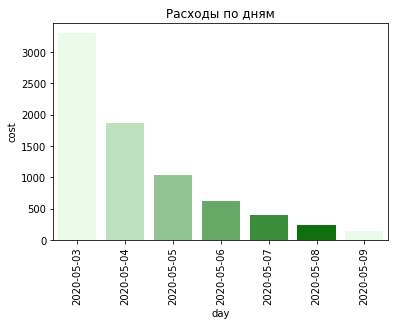

In [27]:
sns.barplot(x = 'day', y = 'cost', data = ad_costs.groupby('day').agg({'cost':'sum'}).reset_index(), palette = palette)
plt.title('Расходы по дням')
plt.xticks(rotation=90)
plt.show()

Больше всего денег расходовали в начале, потом постепенно снижался рекламный бюджет

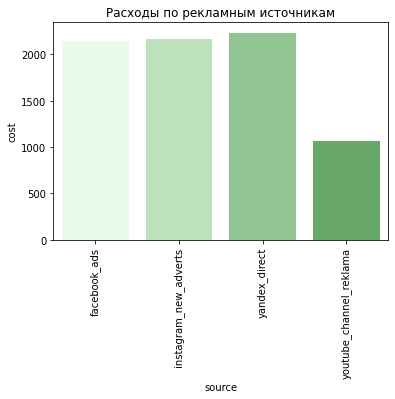

In [28]:
sns.barplot(x = 'source', y = 'cost', data = ad_costs.groupby('source').agg({'cost':'sum'}).reset_index())
plt.title('Расходы по рекламным источникам')
plt.xticks(rotation=90)
plt.show()

При этом больше всего денег потратили на яндекс директ, а меньше всего на ютуб

In [29]:
full_table.day = pd.to_datetime(full_table.day)
full_table.day = full_table.day.dt.date

In [30]:
full_table.groupby('day').agg({'event':'count'}).reset_index()

,day,event
0,2020-05-04,8171
1,2020-05-05,9055
2,2020-05-06,9925
3,2020-05-07,10858
4,2020-05-08,12059
5,2020-05-09,13129
6,2020-05-10,15207
7,2020-05-11,8185
8,2020-05-12,7918
9,2020-05-13,7624


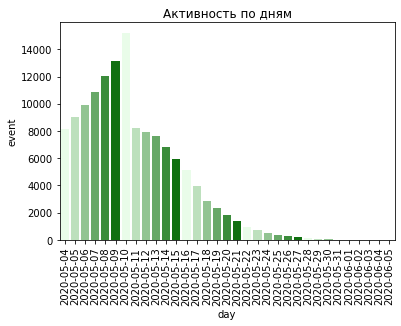

In [31]:
sns.barplot(x = 'day', y = 'event', data = full_table.groupby('day').agg({'event':'count'}).reset_index(), palette = palette)
plt.title('Активность по дням')
plt.xticks(rotation=90)
plt.show()

Больше всего событий было зафиксировано на майских праздниках, потом актиность сходит на нет 

---

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида


Наверное это вкусовщина, но лично мне кажется странным такой градиент -- он не несет какого-то смысла при этом)
    
А в остальном -- графики полезны)    
</div>

---

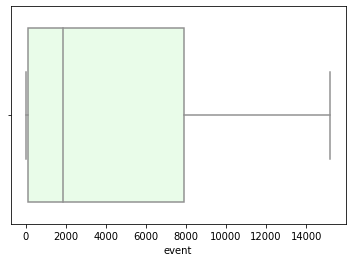

In [32]:
sns.boxplot(full_table.groupby('day').agg({'event':'count'}).reset_index()['event'])
plt.show()

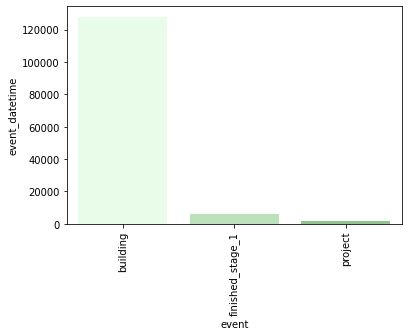

In [33]:
sns.barplot(x = 'event', y = 'event_datetime', data = full_table.groupby('event').agg({'event_datetime':'count'}).reset_index())
plt.xticks(rotation=90)
plt.show()

Разумеется чаще всего игроки что-то строят, при этом заканчивают первую фазу или проект - очень мало игроков 

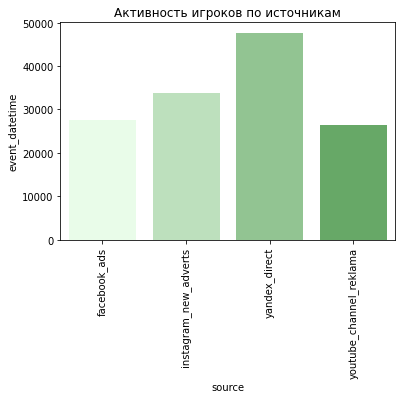

In [34]:
sns.barplot(x = 'source', y = 'event_datetime', palette = palette, data = full_table.groupby('source').agg({'event_datetime':'count'}).reset_index())
plt.title('Активность игроков по источникам')
plt.xticks(rotation=90)
plt.show()

Больше всего событий приходится на аудиторию из яндекса. 

---
## ИСПРАВИЛ
<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида

Если ты хочешь сравивать активность в зависимости от источника, то надо смотреть не общее количество событий, а колисетво событий на человека, например. Потому что в яндексе может быть больше событий просто потому что как мы знаем оттуда пришло больше всего людей.
</div>

---

In [35]:
events_per_user = full_table.groupby('source').agg({'event':'count', 'user_id':'nunique'})

In [36]:
events_per_user['events_per_user'] = events_per_user['event']/ events_per_user['user_id']

In [37]:
events_per_user

,event,user_id,events_per_user
source,,,
facebook_ads,27672,2726,10.151137
instagram_new_adverts,33757,3347,10.085748
yandex_direct,47694,4817,9.901183
youtube_channel_reklama,26516,2686,9.871929


самые активные пользователи из фэйсбука, самые неактивные - из ютуба. Но разница совсем небольшая. 

---

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида


Ну а тут вот ты как раз все верно делаешь, но вывод почему-то пишешь к странному графику сверху)
</div>

---

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2


Да -- так писать правильнее. 

Но мы уже это обсудили в личке)
</div>

---

## Ретеншн 

In [38]:
full_table.head()

,event_datetime,event,building_type,user_id,project_type,source,game_start,day
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04 00:00:01,2020-05-04
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04 00:00:01,2020-05-05
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04 00:00:01,2020-05-05
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04 00:00:01,2020-05-05
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama,2020-05-04 00:00:01,2020-05-06


In [39]:
full_table['first_act'] = full_table['game_start'].dt.date

In [40]:
full_table['first_act'] = pd.to_datetime(full_table['first_act'])

In [41]:
full_table['day'] = pd.to_datetime(full_table['day'])

In [42]:
full_table['cohort_lifetime'] = ((full_table['day'] - full_table['first_act'])/ np.timedelta64(1,'D')).astype('int')


In [43]:
cohorts = full_table.groupby(['first_act','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()

In [44]:
cohorts.head()

,first_act,cohort_lifetime,user_id
0,2020-05-04,0,5860
1,2020-05-04,1,3021
2,2020-05-04,2,3204
3,2020-05-04,3,3412
4,2020-05-04,4,3564


In [45]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_act','user_id']]

In [46]:
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})


In [47]:
cohorts = cohorts.merge(initial_users_count,on='first_act')

In [48]:
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users']

In [94]:
retention_pivot = cohorts.query('cohort_lifetime !=0').pivot_table(index='first_act',columns='cohort_lifetime',values='retention',aggfunc='sum')

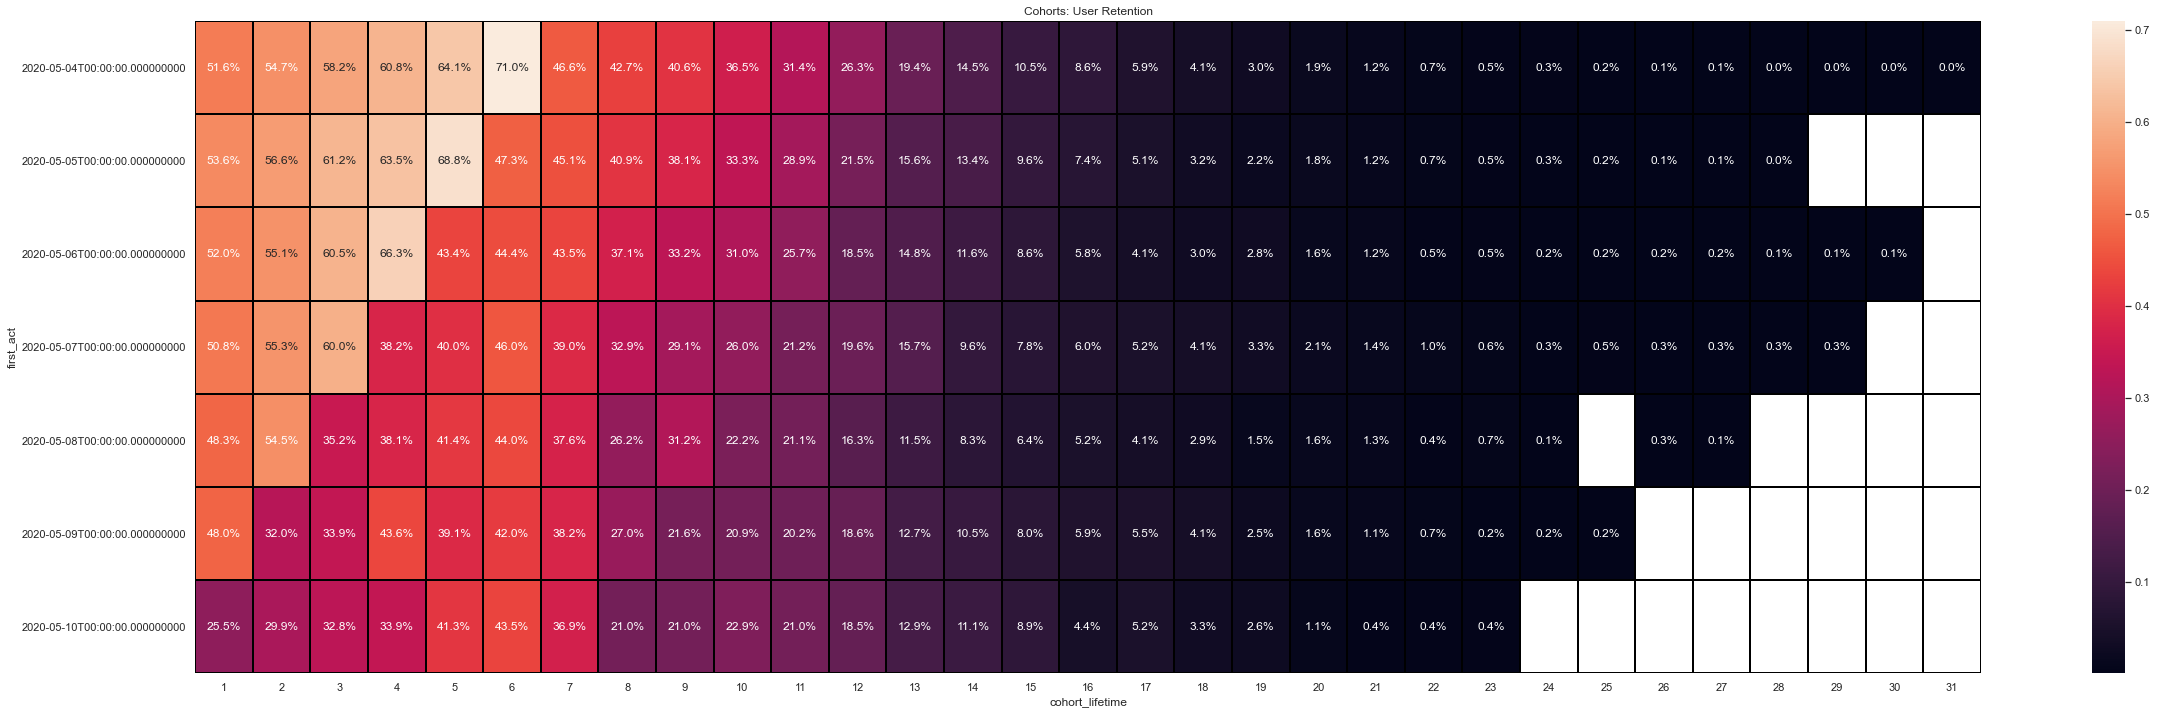

In [95]:
sns.set(style='white')
plt.figure(figsize=(40, 12))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black')
plt.show();

Данные за неделю, поэтому логично разбить на когорты по дням. Интересно, что месяц в игру не играет практически никто, видимо она довольно сложная или неинтересная, при этом видно, что более поздние когорты - играют реже и хуже возвращаются в игру, в отиличии от когорт старых. 

---

<div class="alert alert-block alert-warning">
    

### Комментарий от тимлида


Да, а также возможен вариант что наши пользователи заканчивают уровень)
    
По поводу раскарски -- ее можно было бы сделать нагляднее если ты удалишь 1й столбец.
    
И не заметил ли ты характерной диагональной линии? О чем она говорит?    
</div>

---

# Этап № 3. Анализ влияния событий на совершение целевого события. 
* Софрмировать воронку
* Посмотреть на воронку в разрезе источников 
* Визуализировать
* Основные выводы и поиск места для показа рекламы 

### Гипотеза: 

Рекламу надо показывать в начале, так как можно охватить большее количество пользователей. 

In [51]:
def funnel(df):
    funnel = df.groupby('event').agg({'user_id':'nunique'}).reset_index()
    funnel['conv'] = (funnel['user_id']/funnel['user_id'][0]*100).round(2)
    return funnel

In [52]:
funnel(full_table)

,event,user_id,conv
0,building,13576,100.00
1,finished_stage_1,5817,42.85
2,project,1866,13.74


In [53]:
for source in list(full_table['source'].unique()):
    print('Воронка для', source)
    display(funnel(full_table.query(f'source == @source')))

Воронка для youtube_channel_reklama


,event,user_id,conv
0,building,2686,100.00
1,finished_stage_1,1159,43.15
2,project,379,14.11


Воронка для facebook_ads


,event,user_id,conv
0,building,2726,100.00
1,finished_stage_1,1150,42.19
2,project,391,14.34


Воронка для instagram_new_adverts


,event,user_id,conv
0,building,3347,100.00
1,finished_stage_1,1466,43.80
2,project,476,14.22


Воронка для yandex_direct


,event,user_id,conv
0,building,4817,100.00
1,finished_stage_1,2042,42.39
2,project,620,12.87


В целом воронки с соизмеримой конверсией, интересно, что меньше всего завершаюют проектами пользователи, пришедшие из яндекса. 
А при этом строителей больше всего приходит из фб

---

<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида


Выводы и комментарии?)</div>

---

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2


Да -- источники немного отличаются.
</div>

---

## Этап № 4. Проверка статистических гипотез.

* Проверьте гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

## Раз: 

* H0: Среднее время прохождения не отличается между группой "убийц" и "строителей"
* H1: Среднее время прохождения отличается между группой "убийц" и "строителей"

Списки юзеров, которые относятся к сравниваемым группам. 

In [54]:
print('всего игроков ', full_table.user_id.nunique())



всего игроков  13576


In [55]:
killers = list(full_table[full_table['project_type'].isnull()].query('event== "finished_stage_1"')['user_id'].unique())

In [56]:
print('убийц из них', len(killers), 'это ', round(((len(killers)/full_table.user_id.nunique())*100),2), 'процента от общего числа')

убийц из них 5817 это  42.85 процента от общего числа


In [57]:
builders = list(full_table[~full_table['project_type'].isnull()]['user_id'].unique())

In [58]:
print('строиетелй из них', len(builders), 'это ', round(((len(builders)/full_table.user_id.nunique())*100),2), 'процента от общего числа')

строиетелй из них 1866 это  13.74 процента от общего числа


In [59]:
print('всего прошли уровень', (len(builders)+len(killers)), 'это ', round((7683/full_table.user_id.nunique()*100), 2), 'процента от общего числа')

всего прошли уровень 7683 это  56.59 процента от общего числа


In [60]:
round((7683/full_table.user_id.nunique()*100), 2)

56.59

In [61]:
builders_table = full_table.query('user_id in @builders')

In [62]:
killers_table = full_table.query('user_id in @killers')

In [63]:
builders_table['delta'] = (builders_table.query('event=="project"')['day'] - builders_table.query('event=="project"')['first_act'])/np.timedelta64(1,'D')

<ipython-input-63-9ea3b87fa18d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  builders_table['delta'] = (builders_table.query('event=="project"')['day'] - builders_table.query('event=="project"')['first_act'])/np.timedelta64(1,'D')


In [64]:
builders_table.query('event=="project"').head()

,event_datetime,event,building_type,user_id,project_type,source,game_start,day,first_act,cohort_lifetime,delta
17,2020-05-13 06:53:03,project,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,satellite_orbital_assembly,facebook_ads,2020-05-04 00:00:03,2020-05-13,2020-05-04,9,9.0
97,2020-05-18 02:18:19,project,NaN,65a92713-5969-48b1-8945-bfefa5063887,satellite_orbital_assembly,yandex_direct,2020-05-04 00:00:44,2020-05-18,2020-05-04,14,14.0
110,2020-05-18 18:28:31,project,NaN,fa352362-d258-472c-b295-2796ccc39fa3,satellite_orbital_assembly,youtube_channel_reklama,2020-05-04 00:01:33,2020-05-18,2020-05-04,14,14.0
149,2020-05-14 17:33:52,project,NaN,7b3b6554-7949-4065-9808-d6c79bdc2f58,satellite_orbital_assembly,instagram_new_adverts,2020-05-04 00:02:56,2020-05-14,2020-05-04,10,10.0
219,2020-05-14 02:32:42,project,NaN,b374304d-2f74-4cc1-a4e2-500da44a06c7,satellite_orbital_assembly,facebook_ads,2020-05-04 00:03:46,2020-05-14,2020-05-04,10,10.0


In [65]:
killers_table['delta'] = (killers_table.query('event=="finished_stage_1"')['day'] - killers_table.query('event=="finished_stage_1"')['first_act'])/np.timedelta64(1,'D')

<ipython-input-65-0692ffecdf5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  killers_table['delta'] = (killers_table.query('event=="finished_stage_1"')['day'] - killers_table.query('event=="finished_stage_1"')['first_act'])/np.timedelta64(1,'D')


## Проверка данных на нормальность 

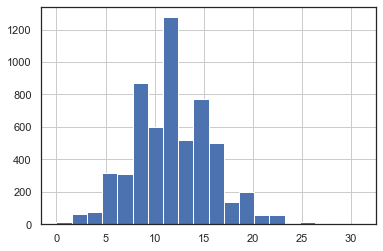

In [66]:
killers_table.query('event=="finished_stage_1"')['delta'].hist(bins = 20)
plt.show()

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида


Здорово что ты помнишь про предпосылки (в данном случае проверка на нормальность) к стат тестам)
</div>

---

Ну, с количеством ячеек 20 - выглядит не совсем нормально, но урупненным - ок. 

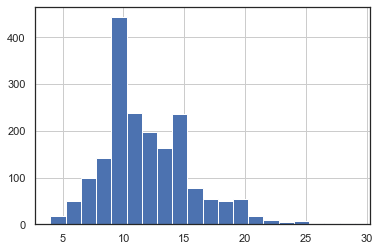

In [67]:
builders_table.query('event=="project"')['delta'].hist(bins = 20)
plt.show()

Здесь тоже данные выглядят не совсем нормально. Стоит проверить на выбросы по продолжительности прохождения уровня. 

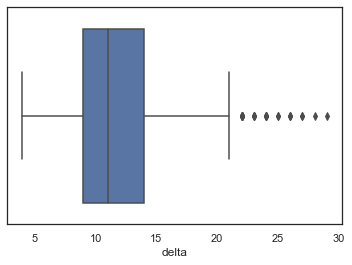

In [68]:
sns.boxplot(x = builders_table.query('event=="project"')['delta'])
plt.show()

То, что больше 23-х дней, наверное можно выкинуть. Тем более их не так уж и много. 

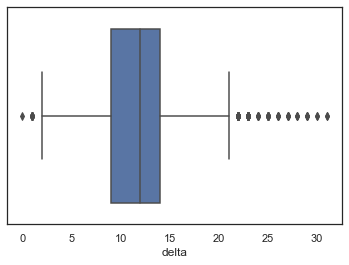

In [69]:
sns.boxplot(x = killers_table.query('event=="finished_stage_1"')['delta'])
plt.show()

Аналогично. 

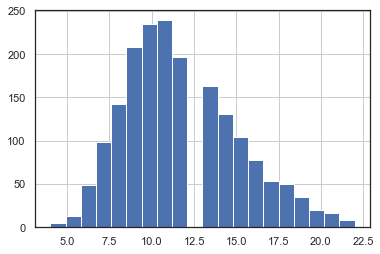

In [70]:
builders_table.query('event=="project" and delta < 23')['delta'].hist(bins = 20)
plt.show()

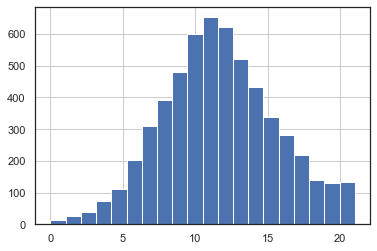

In [71]:
killers_table.query('event=="finished_stage_1" and delta < 22')['delta'].hist(bins = 20)
plt.show()

Распределения уже больше похожи на нормальные, при этом в группе строителей - есть разрыв в районе 12-ти дней. 
На всякий случай лучше проверить данные с помощью критерия Шапиро-Укилка. 

In [72]:
killers_table.query('event=="finished_stage_1" and delta < 22')['delta'].describe()

count    5722.000000
mean       11.604334
std         3.774083
min         0.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        21.000000
Name: delta, dtype: float64

In [73]:
builders_table.query('event=="project" and delta < 23')['delta'].describe()

count    1848.000000
mean       11.700216
std         3.423376
min         4.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        22.000000
Name: delta, dtype: float64

In [74]:
alpha = .05 

In [75]:
for element in [killers_table.query('event=="finished_stage_1" and delta < 22')['delta'], builders_table.query('event=="project" and delta < 23')['delta']]:

    results = st.shapiro(element)
    p_value = results[1] 

    print('p-значение: ', p_value)

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: распределение не нормально")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  2.2660111402643833e-19
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  6.719975229819876e-20
Отвергаем нулевую гипотезу: распределение не нормально


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Оба распределения - ненормальные, лучше использовать тест Манна-Уитни. 

In [76]:
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(builders_table.query('event=="project" and delta < 23')['delta'], killers_table.query('event=="finished_stage_1"')['delta'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.10586950641136261
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Среднее время для группы "убийц" - 11,6 дней.
Среднее время для группы строителей - 11,7 дней.

Опровергнуть нулевую гипотезу не получилось, время на прохождение первой фазы отличается не сильно. 

---

<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида


Cтоило еще вывести само время, потому что я, напирмер, его уже не помню)
</div>

---

---

<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида


Также тебе надо было сформулировать и проверить вторую гипотезу.
</div>

---

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2


Вообще хорошая практика выводить сами значения -- так понятнее. Спасибо.
</div>

---

## Вторая гипотеза:

H0 - количество событий в группах убийц и строителей не отличается

H1 - количество событий в группах убийц и строителей отличается

In [77]:
killers_events = killers_table.groupby('day').agg({'event':'count', 'user_id':'nunique'})

In [78]:
killers_events['events_per_user'] = killers_events['event']/killers_events['user_id']

In [79]:
builders_events = builders_table.groupby('day').agg({'event':'count', 'user_id':'nunique'})
builders_events['events_per_user'] = builders_events['event']/builders_events['user_id']

In [80]:
#средняя активность игроков-строителей
builders_events['events_per_user'].mean()

1.4423860881203647

In [81]:
#средняя активность игроков-убийц
killers_events['events_per_user'].mean()

1.3887568044156844

На первый взгляд у строителей чуть больше событий, посмотрим на распределения 

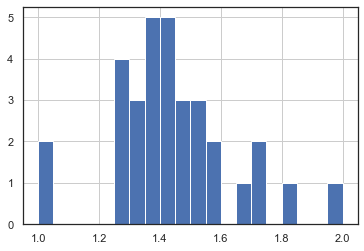

In [82]:
builders_events['events_per_user'].hist(bins = 20)

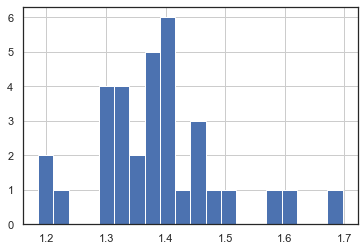

In [83]:
killers_events['events_per_user'].hist(bins = 20)

Сложно сказать из-за пробело, лучше снова проверить

In [84]:
for element in [killers_events['events_per_user'], builders_events['events_per_user']]:

    results = st.shapiro(element)
    p_value = results[1] 

    print('p-значение: ', p_value)

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: распределение не нормально")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  0.13847151398658752
Не получилось отвергнуть нулевую гипотезу, всё нормально
p-значение:  0.10494627803564072
Не получилось отвергнуть нулевую гипотезу, всё нормально


Такие распределения можно считать нормальными, теперь можно сравнить среднее количество событий на пользователя и выяснить какая из групп активнее.

In [85]:
results = st.ttest_ind(
    killers_events['events_per_user'], 
    builders_events['events_per_user'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.18709210847194505
Не получилось отвергнуть нулевую гипотезу


Разница между активностью пользователей, к сожалению, совсем небольшая. Обе группы одинаково активные. 

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2


Да, хорошая гипотеза) Спасибо.
    
Здорово что ты проверяешь предпосылки нормальности.    
</div>

---

## Этап № 5. Расчет окупаемости. Выводы. 

* Формирование основных выводов и предложений
* Подготовка презентации
* Поиск точки безубыточности

In [86]:
ad_costs_grouped = ad_costs.groupby('source').agg({'cost':'sum'})

In [87]:
user_source_grouped = user_source.groupby('source').agg({'user_id':'nunique'})

In [88]:
common_costs = ad_costs_grouped.join(user_source_grouped)

In [89]:
common_costs['cpu'] = common_costs['cost']/common_costs['user_id']

In [90]:
common_costs

,cost,user_id,cpu
source,,,
facebook_ads,2140.904643,2726,0.785365
instagram_new_adverts,2161.441691,3347,0.645785
yandex_direct,2233.111449,4817,0.463590
youtube_channel_reklama,1068.119204,2686,0.397662


In [91]:
common_costs['cpu'].mean()

0.5731002471448883

Дешевле всего обходятся юзеры из ютуба, но там их довольно мало, возможно эту группу стоит масштабировать, отлично себя показывает яндекс - там самые активные и живые пользователи. Фэйсбук - напротив, ощутимо дороже пользователь, но они там не особо активные. Воронки по всем сопоставимы.
В модели окупаемости стоит учитывать, что в среднем на пользователя приходится около 10-ти событий. За эти события, ему нужно показать рекламу столько или так, чтобы окупить затраты на каждый источник.
Лучше всего было бы масштабировать ютуб и яндекс, так как там самая активная и дешевая аудитория, ее можно окупить нечастыми показами рекламы.


In [92]:
events_per_user

,event,user_id,events_per_user
source,,,
facebook_ads,27672,2726,10.151137
instagram_new_adverts,33757,3347,10.085748
yandex_direct,47694,4817,9.901183
youtube_channel_reklama,26516,2686,9.871929


In [93]:
#среднее количество собыйтий на пользователя при прохождении первого уровня
events_per_user['events_per_user'].mean()

10.002499364036549

---

<div class="alert alert-block alert-danger">
    

### Комментарий от тимлида


На основе этих данных и на основе того как часто наши игроки видят окошко постройки объекта стоит написать рекомендуемую стоимость рекламы. Например такую, чтобы наши затраты на привлечние окупались. Это будет первым приближением)
</div>

---

Так как на пользователя приходится около 10-ти событий, логично, что за эти 10 событий нужно окупить затраты на привлечение пользователей. 
Можно предложить показывать 3 раза на каждые 10 событий и брать за один показ 0,2 у.е.

---

<div class="alert alert-block alert-success">
    

### Комментарий от тимлида v2


Да, тут согласна с первоначальной оценкой.
</div>

---

## Выводы: 

* В среднем на пользователя приходится 10 активностей
* Чаще люди предпочитают пройти уровень, победив другого игрока, чем выполнить проект 
* В среднем люди тратят на прохождение первого уровня - чуть больше 11 дней
* Лучшие источники - ютуб и яндекс директ
* Ретенш сильно падает со временем, возможно это связано с сокращением рекламного бюджета (имеется в виду старт когорты)

# Источники:

* Документация python для проверок синтаксиса https://docs.python.org/3/index.html
* Документация seaborn для визуализации https://seaborn.pydata.org/
* Документация pandas https://pandas.pydata.org/pandas-docs/stable/index.html
* Конспекты Яндекс Практикума

---

<div class="alert alert-block alert-danger">
    

### Общий Комментарий от тимлида
    
    
Cпаисбо тебе за работу!)
    
Ты выяснил много крутых вещей, и многие из них будут нужны нашим менеджерам для развития продукта. Но есть еще над чем поработать)
    
Самое критичное по-моему -- что ты уделил маловато внимания разнице между стратегиями. Какой процент наших игроков выбирают ту или иную стратегию? Различаются ли количество событий и время для игроков в зависимости от стратегии.
    
Также у меня есть еще некоторые замечания -- они написаны по ходу работы.
    
По поводу презентации у меня нет претензий -- все хорошо, основная инфомрация есть.
    
    
Жду второй итерации)    


    
    
</div>

---

---

<div class="alert alert-block alert-success">
    

### Общий Комментарий от тимлида v2


Спасибо за доработку!
    
Я увидела ответы на все свои вопросы.
    
Работу зачтена. Фидбэк будет в личке чуть позже) 
</div>

---